In [1]:
"""
<분류 모델>
 - 앙상블 모델들을 주로 사용합니다.
 - 랜덤포레스트, 엑스트라트리, 그레디언트부스팅, 히스트그레디언트부스팅, XGBooting, 이외 다수
 - 앙상블 모델의 대표 모델은 랜덤포레스트 모델입니다.
 - 훈련시 랜덤포레스트 모델 훈련 후 나머지 모델 훈련...
 - 훈련 후 -> 과적합여부 확인 > 평가하여 비교 후 -> 최종 분류 모델 선정
 - 평가 함수 : 정확도, 정밀도, 재현율, F1-Score
 - 선정 우선순위 : F1-Score > 재현율 이 중에 정확도 확인하여 선정
"""

'\n<분류 모델>\n - 앙상블 모델들을 주로 사용합니다.\n - 랜덤포레스트, 엑스트라트리, 그레디언트부스팅, 히스트그레디언트부스팅, XGBooting, 이외 다수\n - 앙상블 모델의 대표 모델은 랜덤포레스트 모델입니다.\n - 훈련시 랜덤포레스트 모델 훈련 후 나머지 모델 훈련...\n - 훈련 후 -> 과적합여부 확인 > 평가하여 비교 후 -> 최종 분류 모델 선정\n - 평가 함수 : 정확도, 정밀도, 재현율, F1-Score\n - 선정 우선순위 : F1-Score > 재현율 이 중에 정확도 확인하여 선정\n'

### 와인 데이터셋 불러들이기

In [2]:
### 사용할 데이터프레임 변수명 : wine
import pandas as pd

In [3]:
file_path = "./data/08_wine.csv"
wine = pd.read_csv(file_path)

wine.info()
wine.head(30)
wine.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0
6496,11.8,0.8,3.26,1.0


### 종속변수와 독립변수로 분리하기

In [4]:
### 독립변수 변수명 : data
### 종속변수 변수명 : target
data = wine[["alcohol", "sugar", "pH"]].to_numpy()
target = wine["class"].to_numpy()

data.shape, target.shape

((6497, 3), (6497,))

### 훈련데이터와 테스트데이터로 분리하기
- 훈련 : 테스트 = 8 : 2
- 훈련 독립/종속 변수명   : train_input / train_target
- 테스트 독립/종속 변수명 : test_input / test_target

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(5197, 3) (5197,)
(1300, 3) (1300,)


### 독립변수 스케일링 처리하기

In [7]:
"""
<데이터 스케일링>
 - 특성들 간의 서로다른 단위를 일정한 수준으로 맞추는 작업
   --> 훈련에 사용하는 데이터 전처리 작업에 속합니다.
   --> 무조건 데이터 스케일링을 하는 것은 아님 (강제사항은 아님)
   --> 원본 데이터로 모델 학습 후 정확도가 좋지 않은 경우 수행하면 됩니다.
   --> 정확도가 좋지 않은 경우 수행하기에 > 데이터 튜닝에 속하기도 합니다.
   
 - 수치형 변수들에 대해서만 적용이 됩니다. (범주형 문자열은 해당 사항 없음)
 - 스케일링 3가지 방법 (일반적으로 정규화라는 이름으로 아래 3가지 사용하기도 함)
  * 정규화 : StandardScaler(회귀 및 분류 모두 사용가능), RobustScaler(회귀 및 분류 모두 사용가능)
  * 표준화 : MinMaxScaler(회귀에서 사용)

 - 훈련 시에 스케일링 방법에 따라 독립변수를 각각 구성하여 훈련에 적용 후 정확도 비교 하기도 함...
"""

'\n<데이터 스케일링>\n - 특성들 간의 서로다른 단위를 일정한 수준으로 맞추는 작업\n   --> 훈련에 사용하는 데이터 전처리 작업에 속합니다.\n   --> 무조건 데이터 스케일링을 하는 것은 아님 (강제사항은 아님)\n   --> 원본 데이터로 모델 학습 후 정확도가 좋지 않은 경우 수행하면 됩니다.\n   --> 정확도가 좋지 않은 경우 수행하기에 > 데이터 튜닝에 속하기도 합니다.\n   \n - 수치형 변수들에 대해서만 적용이 됩니다. (범주형 문자열은 해당 사항 없음)\n - 스케일링 3가지 방법 (일반적으로 정규화라는 이름으로 아래 3가지 사용하기도 함)\n  * 정규화 : StandardScaler(회귀 및 분류 모두 사용가능), RobustScaler(회귀 및 분류 모두 사용가능)\n  * 표준화 : MinMaxScaler(회귀에서 사용)\n\n - 훈련 시에 스케일링 방법에 따라 독립변수를 각각 구성하여 훈련에 적용 후 정확도 비교 하기도 함...\n'

### StandardScaler 사용해 보기

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
### 클래스(변환기) 생성하기
ss = StandardScaler()

### 패턴 찾기(훈련시키기)
ss.fit(train_input)

### 변환 시키기
train_std_scaler = ss.transform(train_input)
test_std_scaler  = ss.transform(test_input)

train_std_scaler, test_std_scaler

(array([[ 0.01376574,  0.4646116 , -0.16888369],
        [ 1.60871671, -0.70299854,  0.26967864],
        [ 1.10504798, -0.70299854,  1.20945505],
        ...,
        [-0.82568214,  0.0267578 ,  0.14437512],
        [-0.82568214,  0.52716215, -0.23153545],
        [-0.82568214, -0.57789745,  1.83597265]]),
 array([[ 1.44082714,  1.52797084,  0.26967864],
        [-0.48990299, -0.68214836,  0.3323304 ],
        [ 1.27293756,  0.40206106, -0.23153545],
        ...,
        [ 1.60871671, -0.76554908, -0.16888369],
        [-0.90962693,  0.88161523,  0.52028568],
        [-1.49724045,  2.09092573, -1.98578474]]))

### MinMaxScaler 사용하기

In [10]:
from sklearn.preprocessing import MinMaxScaler

### 클래스(변환기) 생성하기
mm = MinMaxScaler()

### 패턴 찾기(훈련시키기)
mm.fit(train_input)

### 변환 시키기
train_mm_scaler = mm.transform(train_input)
test_mm_scaler  = mm.transform(test_input)

train_mm_scaler, test_mm_scaler

(array([[0.40322581, 0.10889571, 0.35433071],
        [0.70967742, 0.02300613, 0.40944882],
        [0.61290323, 0.02300613, 0.52755906],
        ...,
        [0.24193548, 0.07668712, 0.39370079],
        [0.24193548, 0.11349693, 0.34645669],
        [0.24193548, 0.03220859, 0.60629921]]),
 array([[0.67741935, 0.18711656, 0.40944882],
        [0.30645161, 0.02453988, 0.41732283],
        [0.64516129, 0.10429448, 0.34645669],
        ...,
        [0.70967742, 0.01840491, 0.35433071],
        [0.22580645, 0.13957055, 0.44094488],
        [0.11290323, 0.22852761, 0.12598425]]))

### RobustScaler 사용하기

In [11]:
from sklearn.preprocessing import RobustScaler

### 클래스(변환기) 생성하기
rs = RobustScaler()

### 패턴 찾기(훈련시키기)
rs.fit(train_input)

### 변환 시키기
train_rs_scaler = rs.transform(train_input)
test_rs_scaler  = rs.transform(test_input)

train_rs_scaler, test_rs_scaler

(array([[ 0.11111111,  0.734375  , -0.0952381 ],
        [ 1.16666667, -0.140625  ,  0.23809524],
        [ 0.83333333, -0.140625  ,  0.95238095],
        ...,
        [-0.44444444,  0.40625   ,  0.14285714],
        [-0.44444444,  0.78125   , -0.14285714],
        [-0.44444444, -0.046875  ,  1.42857143]]),
 array([[ 1.05555556,  1.53125   ,  0.23809524],
        [-0.22222222, -0.125     ,  0.28571429],
        [ 0.94444444,  0.6875    , -0.14285714],
        ...,
        [ 1.16666667, -0.1875    , -0.0952381 ],
        [-0.5       ,  1.046875  ,  0.42857143],
        [-0.88888889,  1.953125  , -1.47619048]]))

### 랜덤포레스트 분류 모델로 훈련 시키기

In [12]:
### 모델 라이브러리 불러들이기
from sklearn.ensemble import RandomForestClassifier

### 훈련모델(클래스) 생성하기
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf

### 모델 훈련 시키기
rf.fit(train_std_scaler, train_target)

### 과적합 여부 확인을 위하여 : 훈련 및 테스트 데이터로 정확도 확인하기
train_score = rf.score(train_std_scaler, train_target)
test_score  = rf.score(test_std_scaler, test_target)

### 과대 적합(훈련이 테스트 정확도보다 너무 많이, 10%이상 높음)이 조금 발생하고 있음
train_score, test_score, (train_score - test_score)

(0.996921300750433, 0.8892307692307693, 0.10769053151966368)

In [13]:
### 모델 라이브러리 불러들이기
from sklearn.ensemble import RandomForestClassifier

### 훈련모델(클래스) 생성하기
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf

### 모델 훈련 시키기
rf.fit(train_mm_scaler, train_target)

### 과적합 여부 확인을 위하여 : 훈련 및 테스트 데이터로 정확도 확인하기
train_score = rf.score(train_mm_scaler, train_target)
test_score  = rf.score(test_mm_scaler, test_target)

### 과대 적합(훈련이 테스트 정확도보다 너무 많이, 10%이상 높음)이 조금 발생하고 있음
train_score, test_score, (train_score - test_score)

(0.996921300750433, 0.8876923076923077, 0.10922899305812528)

In [14]:
### 모델 라이브러리 불러들이기
from sklearn.ensemble import RandomForestClassifier

### 훈련모델(클래스) 생성하기
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf

### 모델 훈련 시키기
rf.fit(train_rs_scaler, train_target)

### 과적합 여부 확인을 위하여 : 훈련 및 테스트 데이터로 정확도 확인하기
train_score = rf.score(train_rs_scaler, train_target)
test_score  = rf.score(test_rs_scaler, test_target)

### 과대 적합(훈련이 테스트 정확도보다 너무 많이, 10%이상 높음)이 조금 발생하고 있음
train_score, test_score, (train_score - test_score)

(0.996921300750433, 0.8876923076923077, 0.10922899305812528)

In [15]:
### 위 3개 스케일링 방법 중 STD 데이터가 가장 좋은 결과를 나타내고 있음

### 예측(분류) 하기

In [16]:
y_pred = rf.predict(test_std_scaler[:10])
### 10개 예측값
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
### 10개 정답(실제값)
test_target[:10]

array([1., 0., 1., 1., 1., 0., 1., 1., 0., 1.])

### 성능평가하기

In [18]:
### 평가를 위해 사용하는 라이브러리
# 평가 때 사용할 시각화 라이브러리------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# 한글처리
plt.rc("font", family="Malgun Gothic")

# 마이너스 기호 표시
plt.rcParams["axes.unicode_minus"] = True

### 평가 라이브러리
# 정확도
from sklearn.metrics import accuracy_score
# 정밀도
from sklearn.metrics import precision_score
# 재현율
from sklearn.metrics import recall_score
# f1-score
from sklearn.metrics import f1_score

In [19]:
### 범주 확인하기
rf.classes_

array([0., 1.])

In [20]:
### 오차행열도 그리기
# 오차행렬도 : 훈련이 잘 되었는지 확인하는 그래프
#  - 분류를 얼마나 잘했는지,
#  - 분류 중 발생한 오차가 어떻게 나타났는지 확이 가능합니다.
#  - 오차행렬도를 그리기 위해서는 오차평가 매트릭스표를 먼저 생성해야함
#  - labels : 종속변수의 범주값 정의
cm = confusion_matrix(test_target[:10], y_pred, labels=rf.classes_)
cm

array([[0, 3],
       [0, 7]])

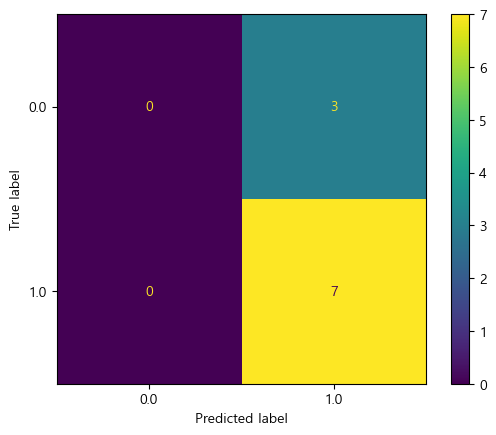

In [21]:
### 오차행렬도 그리기
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                               display_labels=rf.classes_)
disp

disp.plot()

### 평가(평가지표) 추출하기

In [22]:
### 정확도
accuracy_score(test_target[:10], y_pred)

0.7

In [23]:
### 정밀도
precision_score(test_target[:10], y_pred)

0.7

In [24]:
### 재현율
recall_score(test_target[:10], y_pred)

1.0

In [25]:
### f1-score
f1_score(test_target[:10], y_pred)

0.8235294117647058

In [26]:
"""
<정확도(Accuracy)>
 - 올바르게 예측된 데이터의 수를, 전체 데이터의 수로 나눈 값
 - 예측이 실제값과 얼마나 정확한가를 의미함
 - 산술식 = (TP + TN) / (TP + TN + FP + FN)

<정밀도(Precision)>
 - 모델이 True(1)로 예측한 데이터 중에 실제로 True(1)로 맞춘 데이터
 - 산술식 = TP / (TP + FP)

<재현율(Recall)>
 - 실제로 True(1)인 데이터를 True라고 인식한 데이터 수
 - 위험한 오류(부정오류)로 인식한 데이터도 모두 포함
 - 산술식 = TP / (TP + FN)
 - 모델 선정에 깊은 관여를 합니다.

<F1-Score>
 - 정밀도와 재현율을 조합하여 하나의 통계치를 반환한 값
 - 정밀도와 재현율의 평균이라고 생각해도 됩니다.
 - 값이 높을 수록, 성능이 높은 모델이라고 판단할 수 있음
   (최종 모델 선정 기준이 됨)
 - 산술식 = (정밀도 * 재현율) / (정밀도 + 재현율)

[최종 모델 선정 방법]
 - 과소 및 과대적합 확인
 - 정확도, 정밀도, 재현율, F1-Score 모두 1차 확인
 - F1-Score가 가장 높은 모델 선정 
   (선정 시 재현율 다시한번 확인)
 - F1-Score가 동일한 모델이면, 재현율이 높은 모델 순으로 결정
 - 재현율, F1-Score 값이 모두 높은 모델이 가장 best한 모델임
"""

'\n<정확도(Accuracy)>\n - 올바르게 예측된 데이터의 수를, 전체 데이터의 수로 나눈 값\n - 예측이 실제값과 얼마나 정확한가를 의미함\n - 산술식 = (TP + TN) / (TP + TN + FP + FN)\n\n<정밀도(Precision)>\n - 모델이 True(1)로 예측한 데이터 중에 실제로 True(1)로 맞춘 데이터\n - 산술식 = TP / (TP + FP)\n\n<재현율(Recall)>\n - 실제로 True(1)인 데이터를 True라고 인식한 데이터 수\n - 위험한 오류(부정오류)로 인식한 데이터도 모두 포함\n - 산술식 = TP / (TP + FN)\n - 모델 선정에 깊은 관여를 합니다.\n\n<F1-Score>\n - 정밀도와 재현율을 조합하여 하나의 통계치를 반환한 값\n - 정밀도와 재현율의 평균이라고 생각해도 됩니다.\n - 값이 높을 수록, 성능이 높은 모델이라고 판단할 수 있음\n   (최종 모델 선정 기준이 됨)\n - 산술식 = (정밀도 * 재현율) / (정밀도 + 재현율)\n\n[최종 모델 선정 방법]\n - 과소 및 과대적합 확인\n - 정확도, 정밀도, 재현율, F1-Score 모두 1차 확인\n - F1-Score가 가장 높은 모델 선정 \n   (선정 시 재현율 다시한번 확인)\n - F1-Score가 동일한 모델이면, 재현율이 높은 모델 순으로 결정\n - 재현율, F1-Score 값이 모두 높은 모델이 가장 best한 모델임\n'

### 전체 테스트 데이터로 성능평가하기

In [27]:
test_std_scaler.shape

(1300, 3)

0.7123076923076923 0.7345629510825983 0.9551616266944735 0.8304623753399819


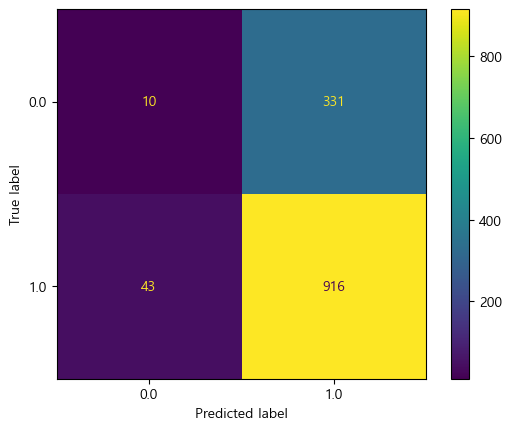

In [29]:
### 예측하기
y_pred = rf.predict(test_std_scaler)
y_pred.shape

### 오차행열도 그리기
cm = confusion_matrix(test_target, y_pred, labels=rf.classes_)

### 오차행렬도 그리기
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                               display_labels=rf.classes_)
disp.plot()

### 정확도
acc = accuracy_score(test_target, y_pred)

### 정밀도
pre = precision_score(test_target, y_pred)

### 재현율
rec = recall_score(test_target, y_pred)

### f1-score
f1 = f1_score(test_target, y_pred)

print(acc, pre, rec, f1)

### 각각 모델에 대해서 하이퍼파라메터 튜닝하기

##### 랜덤포레스트 모델

In [33]:
### n_estimators : 램덤포레스트 모델에서 사용할 트리의 갯수 조정하기
# - 트리의 갯수(n_estimators) : 10개
# - 사용할 CPU 코어 갯수(n_jobs) : 모두
# - 모델이 내부적으로 패턴을 찾는 랜덤규칙(random_state) : 42

### 위 하이퍼파라메터 및 모델 설정값들을 이용해서 모델(클래스) 생성하기
rf = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)
rf

### 훈련시키기 (std 독립변수 데이터 사용)
rf.fit(train_std_scaler, train_target)

### 훈련 정확도 확인하기
train_score = rf.score(train_std_scaler, train_target)

### 테스트 정확도 확인하기
test_score = rf.score(test_std_scaler, test_target)

### 훈련 및 테스트 정확도 출력하기(과적합 여부 확인을 위해서....)
train_score, test_score, train_score-test_score

(0.9917259957667885, 0.8753846153846154, 0.11634138038217312)

In [34]:
### n_estimators : 램덤포레스트 모델에서 사용할 트리의 갯수 조정하기
# - 트리의 갯수(n_estimators) : 5개
# - 사용할 CPU 코어 갯수(n_jobs) : 모두
# - 모델이 내부적으로 패턴을 찾는 랜덤규칙(random_state) : 42

### 위 하이퍼파라메터 및 모델 설정값들을 이용해서 모델(클래스) 생성하기
rf = RandomForestClassifier(n_estimators=5, n_jobs=-1, random_state=42)
rf

### 훈련시키기 (std 독립변수 데이터 사용)
rf.fit(train_std_scaler, train_target)

### 훈련 정확도 확인하기
train_score = rf.score(train_std_scaler, train_target)

### 테스트 정확도 확인하기
test_score = rf.score(test_std_scaler, test_target)

### 훈련 및 테스트 정확도 출력하기(과적합 여부 확인을 위해서....)
train_score, test_score, train_score-test_score

(0.9834519915335771, 0.8723076923076923, 0.11114429922588476)

In [35]:
### n_estimators : 램덤포레스트 모델에서 사용할 트리의 갯수 조정하기
# - 트리의 갯수(n_estimators) : 3개
# - 사용할 CPU 코어 갯수(n_jobs) : 모두
# - 모델이 내부적으로 패턴을 찾는 랜덤규칙(random_state) : 42

### 위 하이퍼파라메터 및 모델 설정값들을 이용해서 모델(클래스) 생성하기
rf = RandomForestClassifier(n_estimators=3, n_jobs=-1, random_state=42)
rf

### 훈련시키기 (std 독립변수 데이터 사용)
rf.fit(train_std_scaler, train_target)

### 훈련 정확도 확인하기
train_score = rf.score(train_std_scaler, train_target)

### 테스트 정확도 확인하기
test_score = rf.score(test_std_scaler, test_target)

### 훈련 및 테스트 정확도 출력하기(과적합 여부 확인을 위해서....)
train_score, test_score, train_score-test_score

(0.9742158937848759, 0.8707692307692307, 0.1034466630156452)

In [38]:
### n_estimators : 램덤포레스트 모델에서 사용할 트리의 갯수 조정하기
# - 트리의 갯수(n_estimators) : 100개
# - 사용할 CPU 코어 갯수(n_jobs) : 모두
# - 모델이 내부적으로 패턴을 찾는 랜덤규칙(random_state) : 42

### 위 하이퍼파라메터 및 모델 설정값들을 이용해서 모델(클래스) 생성하기
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf

### 훈련시키기 (std 독립변수 데이터 사용)
rf.fit(train_std_scaler, train_target)

### 훈련 정확도 확인하기
train_score = rf.score(train_std_scaler, train_target)

### 테스트 정확도 확인하기
test_score = rf.score(test_std_scaler, test_target)

### 훈련 및 테스트 정확도 출력하기(과적합 여부 확인을 위해서....)
train_score, test_score, train_score-test_score

(0.996921300750433, 0.8892307692307693, 0.10769053151966368)

In [40]:
### n_estimators : 램덤포레스트 모델에서 사용할 트리의 갯수 조정하기
# - 트리의 갯수(n_estimators) : 500개
# - 사용할 CPU 코어 갯수(n_jobs) : 모두
# - 모델이 내부적으로 패턴을 찾는 랜덤규칙(random_state) : 42

### 위 하이퍼파라메터 및 모델 설정값들을 이용해서 모델(클래스) 생성하기
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rf

### 훈련시키기 (std 독립변수 데이터 사용)
rf.fit(train_std_scaler, train_target)

### 훈련 정확도 확인하기
train_score = rf.score(train_std_scaler, train_target)

### 테스트 정확도 확인하기
test_score = rf.score(test_std_scaler, test_target)

### 훈련 및 테스트 정확도 출력하기(과적합 여부 확인을 위해서....)
train_score, test_score, train_score-test_score

(0.996921300750433, 0.8853846153846154, 0.11153668536581751)

##### 엑스트라트리(ExtraTree) 모델

In [ ]:
"""
- 램덤포레스트와 유사한 모델
- 기본적(디폴트값)으로 100개의 트리를 사용
- 계산속도가 랜덤포레스트보다 빠름
"""

In [41]:
from sklearn.ensemble import ExtraTreesClassifier

In [44]:
### 훈련모델 생성하기
# - 모델 변수명 : et
#   -- 모델 설정값 : core 모두사용, 랜덤규칙 42
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)

# - 훈련 시키기
et.fit(train_std_scaler, train_target)

# - 훈련 및 테스트 정확도 확인하기
train_score = et.score(train_std_scaler, train_target)
test_score  = et.score(test_std_scaler, test_target)

# - 훈련 및 테스트 정확도 출력하기(과적합 여부 확인)
train_score, test_score, train_score-test_score

(0.996921300750433, 0.8861538461538462, 0.11076745459658677)

In [47]:
### 훈련모델 생성하기
# - 모델 변수명 : et
#   -- 모델 설정값 : core 모두사용, 랜덤규칙 42
et = ExtraTreesClassifier(n_jobs=-1, random_state=42, n_estimators=500)

# - 훈련 시키기
et.fit(train_std_scaler, train_target)

# - 훈련 및 테스트 정확도 확인하기
train_score = et.score(train_std_scaler, train_target)
test_score  = et.score(test_std_scaler, test_target)

# - 훈련 및 테스트 정확도 출력하기(과적합 여부 확인)
train_score, test_score, train_score-test_score

(0.996921300750433, 0.8823076923076923, 0.1146136084427406)

##### 그레디언트 부스팅(Gradient Boosting) 모델

In [ ]:
"""
 - 기존 훈련 모델들의 성능이 좋지 않을 때 주로 사용하는 모델
 - 랜덤포레스트 및 엑스트라트리 모델보다 속도가 느림
 - 트리는 기본값 100 사용
 - **일바화**에 강한 모델임
"""

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
### 훈련모델 생성하기
# - 모델 변수명 : gb
#   -- 모델 설정값 : 랜덤규칙 42
gb = GradientBoostingClassifier(random_state=42)

# - 훈련 시키기
gb.fit(train_std_scaler, train_target)

# - 훈련 및 테스트 정확도 확인하기
train_score = gb.score(train_std_scaler, train_target)
test_score  = gb.score(test_std_scaler, test_target)

# - 훈련 및 테스트 정확도 출력하기(과적합 여부 확인)
train_score, test_score, train_score-test_score

(0.8880123147969983, 0.8669230769230769, 0.021089237873921363)

##### 히스트 그레디언트 부스팅 모델

In [ ]:
"""
 - 정확한 명칭 : 히스토그램 기반 그레디언트 부스팅
                (Histogram-base Gradient Boosting)
 - 앙상블 모델 중에 가장 인기있는 모델임
 - 그레디언트 부스팅 모델의 속도를 개선한 모델 (속도 빠름)
 - 하이퍼파라메터 튜닝을 하지 않아도 성능이 좋은 모델로 평가하고 있음
"""

In [52]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [53]:
### 훈련모델 생성하기
# - 모델 변수명 : hgb
#   -- 모델 설정값 : 랜덤규칙 42
hgb = HistGradientBoostingClassifier(random_state=42)

# - 훈련 시키기
hgb.fit(train_std_scaler, train_target)

# - 훈련 및 테스트 정확도 확인하기
train_score = hgb.score(train_std_scaler, train_target)
test_score  = hgb.score(test_std_scaler, test_target)

# - 훈련 및 테스트 정확도 출력하기(과적합 여부 확인)
train_score, test_score, train_score-test_score

(0.924956705791803, 0.8723076923076923, 0.05264901348411066)

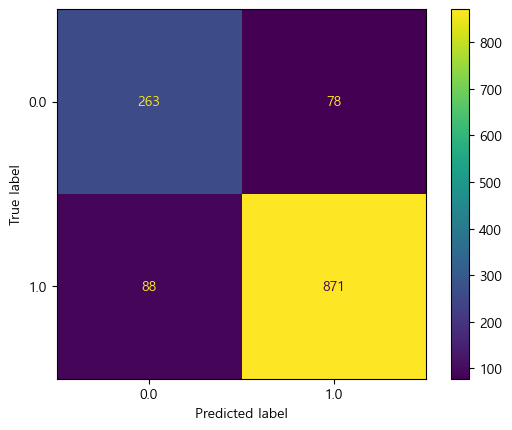

In [56]:
### 테스트 전체 데이터로 예측 하기
# - 예측결과 변수 : y_pred
y_pred = hgb.predict(test_std_scaler)

# - 오차행렬 매트릭스 표 -> 변수명 : cm
cm = confusion_matrix(test_target, y_pred, labels=hgb.classes_)

# - 오차행렬도 그리기 -> 변수명 : disp
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=hgb.classes_)
disp.plot()

In [57]:
### 평가지표 확인하기
# 정확도 -> 변수명 : acc
acc = accuracy_score(test_target, y_pred)

# 정밀도 -> 변수명 : pre
pre = precision_score(test_target, y_pred)

# 재현율 -> 변수명 : rec
rec = recall_score(test_target, y_pred)

# f1-score -> 변수명 : f1
f1 = f1_score(test_target, y_pred)

### 평가지표 모두 출력하기
acc, pre, rec, f1

(0.8723076923076923, 0.9178082191780822, 0.908237747653806, 0.9129979035639413)

In [ ]:
"""
(해석)
 - HGB 훈련 모델은 0.92 이상의 매우 높은 정확도를 나타내고 있으며,
 - 재현율 0.91, f1-score 0.91의 매우 높은 평가 지표를 나타내고 있음
 - 따라서, 와인분류를 위해 HGB 모델을 활용하는데 문제가 없을 것으로 판단함 
"""

In [58]:
hgb

HistGradientBoostingClassifier(random_state=42)

##### 엑스지비(XGB) 모델

In [ ]:
"""
 - HGB 모델과 유사한 성능을 나타냄
 - sklearn 패키지에 포함되어 있지 않음
"""

In [59]:
from xgboost import XGBClassifier

from sklearn import set_config
set_config(display="text")

In [62]:
### 모델(클래스) 생성하기
xgb = XGBClassifier(random_state = 42)
xgb

### 훈련 시키기
xgb.fit(train_std_scaler, train_target)

# - 훈련 및 테스트 정확도 확인하기
train_score = xgb.score(train_std_scaler, train_target)
test_score  = xgb.score(test_std_scaler, test_target)

# - 훈련 및 테스트 정확도 출력하기(과적합 여부 확인)
train_score, test_score, train_score-test_score

(0.9513180681162209, 0.88, 0.07131806811622088)

In [ ]:
"""
GB  : (0.8880123147969983, 0.8669230769230769, 0.021089237873921363)
HGB : (0.924956705791803,  0.8723076923076923, 0.05264901348411066)
XGB : (0.9513180681162209, 0.88,               0.07131806811622088)
"""

In [64]:
### 예측하기
y_pred = xgb.predict(test_std_scaler)

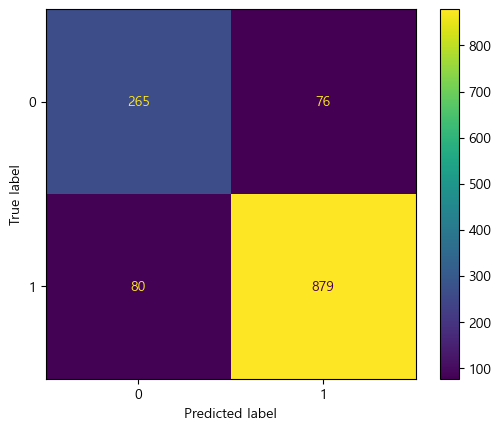

In [66]:
### 오차 매트릭스 표
cm = confusion_matrix(test_target, y_pred, labels=xgb.classes_)

### 혼동(오차)행렬도
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot()

In [67]:
### 평가지표 확인하기
# 정확도 -> 변수명 : acc
acc = accuracy_score(test_target, y_pred)

# 정밀도 -> 변수명 : pre
pre = precision_score(test_target, y_pred)

# 재현율 -> 변수명 : rec
rec = recall_score(test_target, y_pred)

# f1-score -> 변수명 : f1
f1 = f1_score(test_target, y_pred)

### 평가지표 모두 출력하기
acc, pre, rec, f1

(0.88, 0.9204188481675393, 0.9165797705943691, 0.9184952978056427)

In [ ]:
"""
HGB : (0.8723076923076923, 0.9178082191780822, 0.908237747653806,  0.9129979035639413)
XGB : (0.88,               0.9204188481675393, 0.9165797705943691, 0.9184952978056427)
"""

### 전체 모델에 대한 결과를 데이터프레임의 행렬 표로 만들기

In [ ]:
"""
 - 데이터프레임 변수명 : df
 - 사용 모델 5개 : rf, et, gb, hgb, xgb 모델 사용하여 아래 컬럼에 대한 결과값 추출하여 행 추가하기
 - 컬럼명 : 모델명, 훈련정확도, 예측정확도, 정밀도, 재현율, f1-score, 훈련-예측
 - 각 모델은 설정값 랜덤규칙 42값만 사용하여 모델 생성

 - 함수 이용하기 : 함수명은 getResult

 <순서>
  1. 위에서 각 모델별로 수행한 내용들을 기반으로 하나의 모델로 함수 정의해서 테스트 해보기...
    -> 함수에서 컬럼명에 대한 값들을 모두 추출하여 반환(return) 하는 기능으로 처리
  2. 모델을 리스트에 모두 넣어서 반복 테스트 해보기 -> 반복시 1번에서 정의한 함수 호출 -> 반환 결과 확인
  3. 반복문에서 함수 호출 후 반환 결과를 데이터프레임에 넣는 처리 진행
    -> 깨끗한 데이터프레임 생성(df)
    -> 반환 받은 값들을 데이터프레임으로 만들어서, 깨끗한 데이터프레임에 추가(concat함수 사용)
"""

In [68]:
### 1. 위에서 각 모델별로 수행한 내용들을 기반으로 하나의 모델로 함수 정의해서 테스트 해보기...
#    -> 함수에서 컬럼명에 대한 값들을 모두 추출하여 반환(return) 하는 기능으로 처리
def getResult(model) :
    ### 모델 이름 추출하기
    model_nm = model.__class__.__name__
    
    ### 훈련 시키기
    model.fit(train_std_scaler, train_target)
    
    # - 훈련 및 테스트 정확도 확인하기
    train_score = model.score(train_std_scaler, train_target)
    test_score  = model.score(test_std_scaler, test_target)

    ### 예측하기
    y_pred = model.predict(test_std_scaler)

    ### 평가지표 확인하기
    # 정확도 -> 변수명 : acc
    acc = accuracy_score(test_target, y_pred)
    
    # 정밀도 -> 변수명 : pre
    pre = precision_score(test_target, y_pred)
    
    # 재현율 -> 변수명 : rec
    rec = recall_score(test_target, y_pred)
    
    # f1-score -> 변수명 : f1
    f1 = f1_score(test_target, y_pred)

    return model_nm, train_score, test_score, pre, rec, f1, train_score-test_score

In [70]:
### 모델 생성
rf = RandomForestClassifier(random_state=42)

### 함수 호출 테스트
m_nm, train_s, test_s, pre, rec, f1, score_minus = getResult(model=rf)
m_nm, train_s, test_s, pre, rec, f1, score_minus

('RandomForestClassifier',
 0.996921300750433,
 0.8892307692307693,
 0.9222797927461139,
 0.9280500521376434,
 0.9251559251559252,
 0.10769053151966368)

In [77]:
### 반복문으로 5개 모델 일괄 처리
# 모델 5개 생성해서 리스트 변수에 넣기 -> 해당 리스트 변수로 반복 패턴 정의

models = [RandomForestClassifier(random_state=42),
          ExtraTreesClassifier(random_state=42),
          GradientBoostingClassifier(random_state=42),
          HistGradientBoostingClassifier(random_state=42),
          XGBClassifier(random_state=42)]
# models

### 깨끗한 데이터프레임 정의(모델의 모든 반환값을 넣을 데이터프레임)
df = pd.DataFrame()

for model in models:
    # print(model)
    
    ### 함수 호출 테스트
    m_nm, train_s, test_s, pre, rec, f1, score_minus = getResult(model=model)
    # print(m_nm, train_s, test_s, pre, rec, f1, score_minus)

    ### 반환받은 결과값을 데이터프레임으로 만들기
    df_temp = pd.DataFrame([[m_nm, train_s, test_s, pre, rec, f1, score_minus]],
                             columns=["모델명", "훈련정확도", "예측정확도", 
                                      "정밀도", "재현율", "f1-score", "훈련-예측"])
    # print(df_temp)

    ### df_temp 결과를 -> 깨끗한 데이터프레임(df)에 추가하기
    # - ignore_index=True : 행을 추가할 때 마다 인덱스값을 자동 증가 시키기
    df = pd.concat([df, df_temp], ignore_index=True)

In [78]:
df

,모델명,훈련정확도,예측정확도,정밀도,재현율,f1-score,훈련-예측
0,RandomForestClassifier,0.996921,0.889231,0.922280,0.928050,0.925156,0.107691
1,ExtraTreesClassifier,0.996921,0.886154,0.915897,0.931178,0.923475,0.110767
2,GradientBoostingClassifier,0.888012,0.866923,0.905155,0.915537,0.910316,0.021089
3,HistGradientBoostingClassifier,0.924957,0.872308,0.917808,0.908238,0.912998,0.052649
4,XGBClassifier,0.951318,0.880000,0.920419,0.916580,0.918495,0.071318


In [81]:
### 최종 결과물을 파일로 저장한 후 향후 사용
save_path = "./result_data/result_data.xlsx"

df.to_excel(save_path, index=False)

In [82]:
### 최종 결과물을 파일로 저장한 후 향후 사용
save_path = "./result_data/result_data.html"

df.to_html(save_path, index=False)

In [83]:
### 최종 결과물을 파일로 저장한 후 향후 사용
save_path = "./result_data/result_data.json"

df.to_json(save_path, index=False)